# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# open cities.cvs file to import data
output_data_file = "Resources/cities.cvs"

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | zhangye
Processing Record 3 of Set 1 | ivdel
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | vaasa
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | shakawe
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | waipawa
Processing Record 17 of Set 1 | manitouwadge
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | luena
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | mataura
Processing Record 23 of

Processing Record 35 of Set 4 | fairbanks
Processing Record 36 of Set 4 | marienburg
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | maxixe
Processing Record 39 of Set 4 | nikolskoye
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | spas-demensk
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | cairns
Processing Record 45 of Set 4 | tura
Processing Record 46 of Set 4 | arrecife
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | uvalde
Processing Record 0 of Set 5 | woodward
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | biskupiec
Processing Record 3 of Set 5 | haverfordwest
Processing Record 4 of Set 5 | verkhoyansk
Processing Record 5 of Set 5 | saryozek
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | coahuayana
Processing Record 8 of Set 5 | kahului
Proces

Processing Record 25 of Set 8 | zasechnoye
Processing Record 26 of Set 8 | itoigawa
Processing Record 27 of Set 8 | manggar
Processing Record 28 of Set 8 | beihai
Processing Record 29 of Set 8 | kibala
Processing Record 30 of Set 8 | dunedin
Processing Record 31 of Set 8 | broome
Processing Record 32 of Set 8 | red wing
Processing Record 33 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 34 of Set 8 | inirida
Processing Record 35 of Set 8 | qafsah
City not found. Skipping...
Processing Record 36 of Set 8 | samusu
City not found. Skipping...
Processing Record 37 of Set 8 | nishihara
Processing Record 38 of Set 8 | martapura
Processing Record 39 of Set 8 | sorland
Processing Record 40 of Set 8 | oktyabrskoye
Processing Record 41 of Set 8 | hambantota
Processing Record 42 of Set 8 | praia da vitoria
Processing Record 43 of Set 8 | punta alta
Processing Record 44 of Set 8 | santa marta
Processing Record 45 of Set 8 | chik
Processing Record 46 of Set 8 | jumla
Process

Processing Record 12 of Set 12 | dongsheng
Processing Record 13 of Set 12 | grenaa
Processing Record 14 of Set 12 | lazaro cardenas
Processing Record 15 of Set 12 | morondava
Processing Record 16 of Set 12 | chabahar
Processing Record 17 of Set 12 | atambua
Processing Record 18 of Set 12 | zigong
Processing Record 19 of Set 12 | kuche
City not found. Skipping...
Processing Record 20 of Set 12 | baiao
Processing Record 21 of Set 12 | shelburne
Processing Record 22 of Set 12 | madang
Processing Record 23 of Set 12 | kuliyapitiya
Processing Record 24 of Set 12 | luanda
Processing Record 25 of Set 12 | turukhansk
Processing Record 26 of Set 12 | tongren
Processing Record 27 of Set 12 | vanimo
Processing Record 28 of Set 12 | bako
Processing Record 29 of Set 12 | kiunga
Processing Record 30 of Set 12 | plettenberg bay
Processing Record 31 of Set 12 | taikang
Processing Record 32 of Set 12 | visby
Processing Record 33 of Set 12 | sabha
Processing Record 34 of Set 12 | taburi
City not found. 

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,-4.25,97,100,7.83,RU,1675231945
1,zhangye,38.9342,100.4517,26.71,38,94,1.03,CN,1675231946
2,ivdel,60.6911,60.4206,19.99,93,81,4.56,RU,1675231947
3,puerto ayora,-0.7393,-90.3518,75.54,91,70,4.94,EC,1675231948
4,vaasa,63.0960,21.6158,26.62,93,100,3.44,FI,1675231950


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-4.25,97,100,7.83,RU,1675231945
1,zhangye,38.9342,100.4517,26.71,38,94,1.03,CN,1675231946
2,ivdel,60.6911,60.4206,19.99,93,81,4.56,RU,1675231947
3,puerto ayora,-0.7393,-90.3518,75.54,91,70,4.94,EC,1675231948
4,vaasa,63.0960,21.6158,26.62,93,100,3.44,FI,1675231950


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

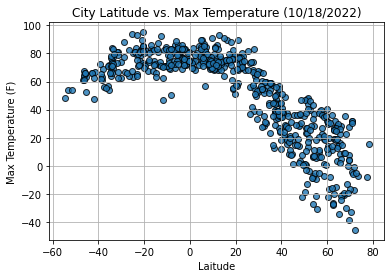

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

# Set title
plt.title("City Latitude vs. Max Temperature (10/18/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

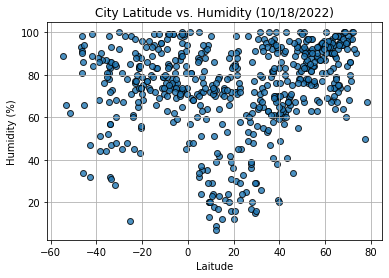

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties

# Set title
plt.title("City Latitude vs. Humidity (10/18/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

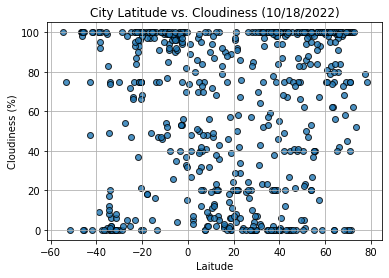

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# Set title
plt.title("City Latitude vs. Cloudiness (10/18/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(True)



# Save the figure
plt.savefig("Resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

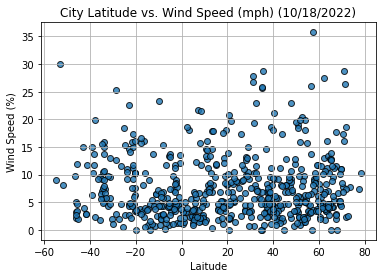

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "black",
            linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties

# Set title
plt.title("City Latitude vs. Wind Speed (mph) (10/18/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set grid line
plt.grid(True)


# Save the figure
plt.savefig("Resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Regression on hemispheres
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
# print plot was required in order to save pngs as plt.show would save blank photos from functions    
    print(plt)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-4.25,97,100,7.83,RU,1675231945
1,zhangye,38.9342,100.4517,26.71,38,94,1.03,CN,1675231946
2,ivdel,60.6911,60.4206,19.99,93,81,4.56,RU,1675231947
4,vaasa,63.0960,21.6158,26.62,93,100,3.44,FI,1675231950
5,husavik,66.0449,-17.3389,28.31,95,100,9.55,IS,1675231950


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,75.54,91,70,4.94,EC,1675231948
6,bluff,-46.6000,168.3333,61.02,93,100,9.78,NZ,1675231951
7,shakawe,-18.3667,21.8500,67.68,93,100,3.83,BW,1675231951
9,new norfolk,-42.7826,147.0587,65.71,32,48,4.00,AU,1675231827
10,cidreira,-30.1811,-50.2056,73.94,92,0,1.92,BR,1675231953


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7442141079464674
<module 'matplotlib.pyplot' from 'C:\\Users\\sanch\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>


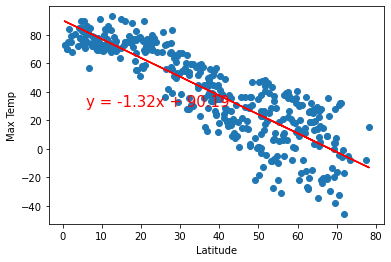

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))



The r-value is: 0.2376441782389758
<module 'matplotlib.pyplot' from 'C:\\Users\\sanch\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>


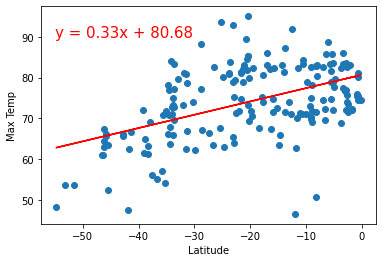

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22849377205058738
<module 'matplotlib.pyplot' from 'C:\\Users\\sanch\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>


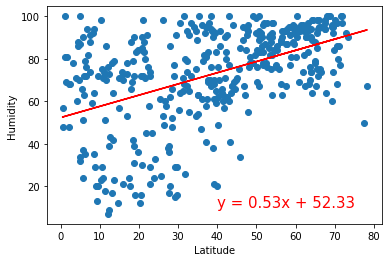

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))



The r-value is: 0.03941036078664217
<module 'matplotlib.pyplot' from 'C:\\Users\\sanch\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>


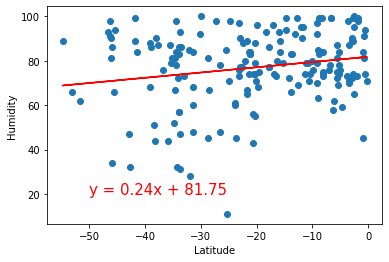

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13587543188542311
<module 'matplotlib.pyplot' from 'C:\\Users\\sanch\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>


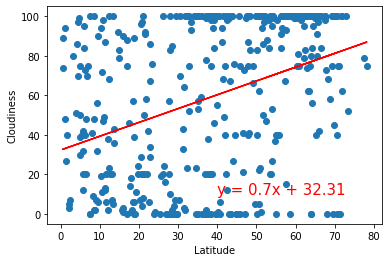

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))



The r-value is: 0.08331821096585683
<module 'matplotlib.pyplot' from 'C:\\Users\\sanch\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>


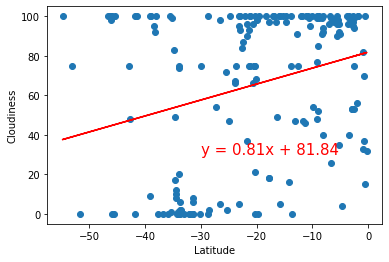

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005689678244340704
<module 'matplotlib.pyplot' from 'C:\\Users\\sanch\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>


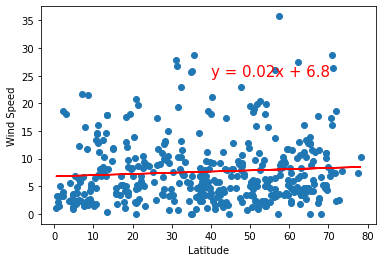

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))



The r-value is: 0.04635286626770341
<module 'matplotlib.pyplot' from 'C:\\Users\\sanch\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>


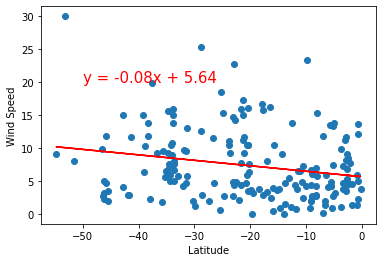

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))



**Discussion about the linear relationship:** 
WeatherPywritten description of three observable trends based on the data
Locations between 0 and 20 degrees Lattitude have the highest max tempurature and tempuratures fall as you get further away from those locations. (see Latitude vs Temperature plot below)
There seems to be no locational relationship to location vs cloudiness.
Latitude does not have a strong influence on wind speed.